In [1]:
%run AdultCensusData.ipynb

Loaded file!


## Handling missing values

In [11]:
dataSet.head(50)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?


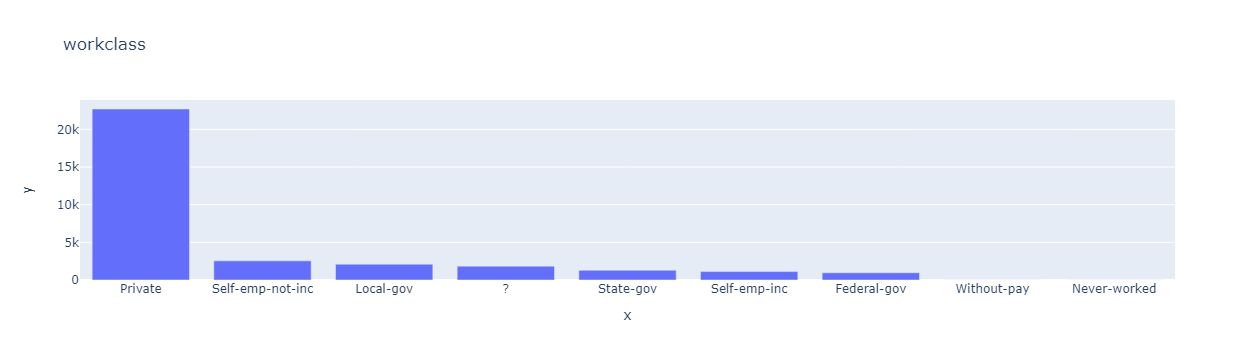

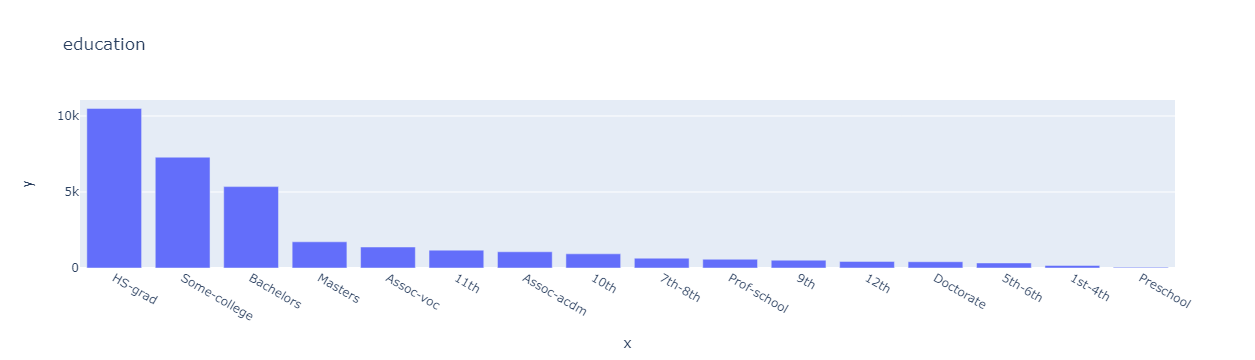

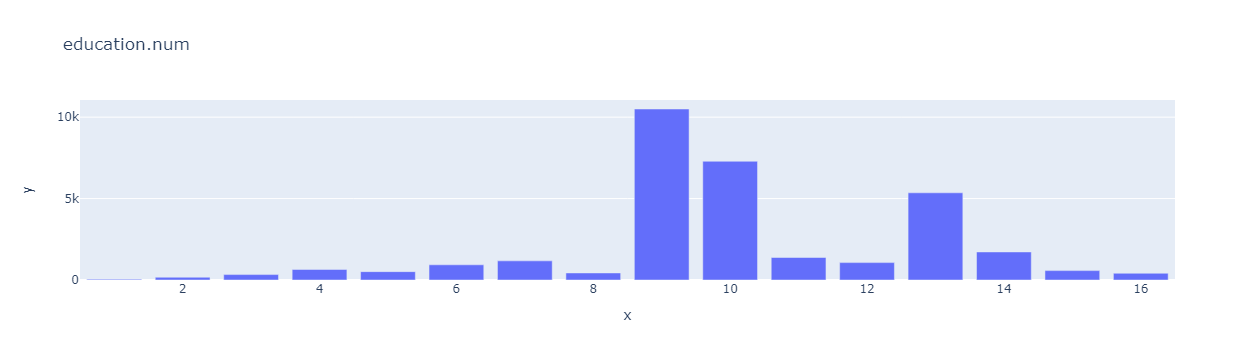

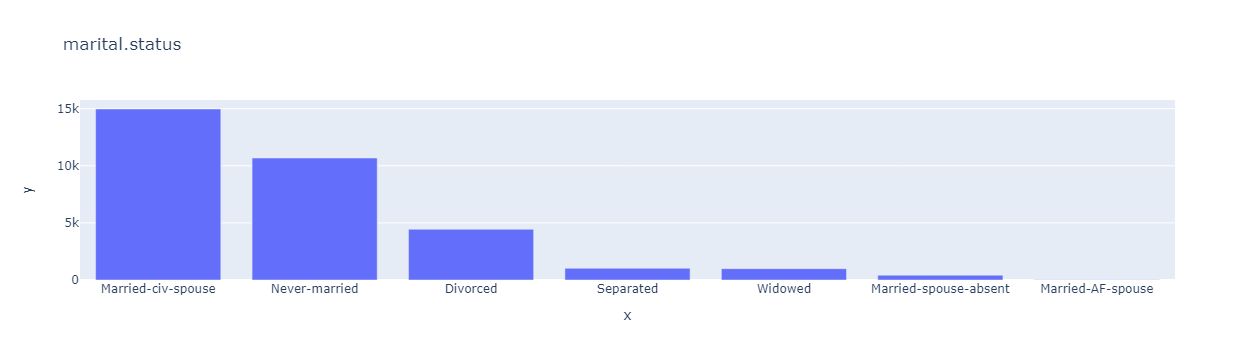

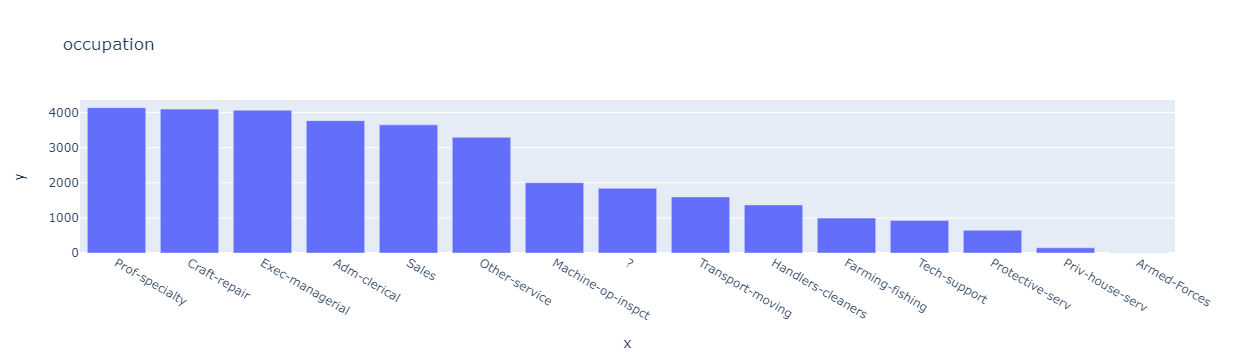

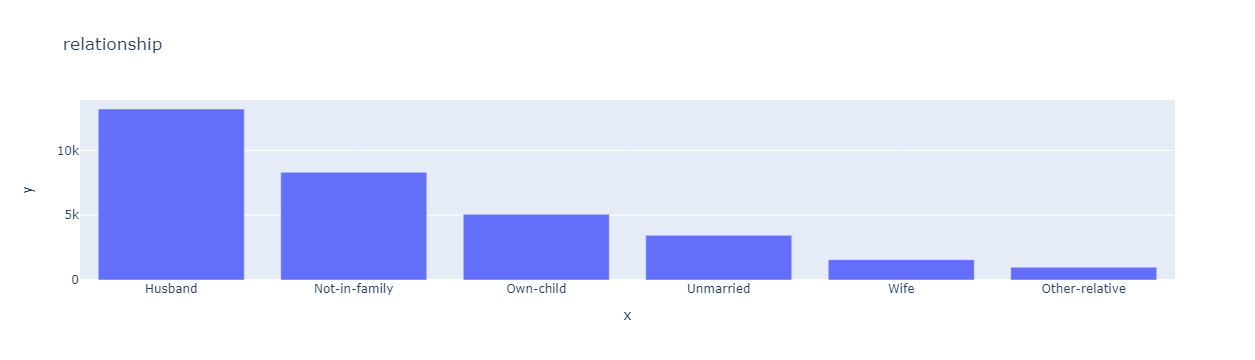

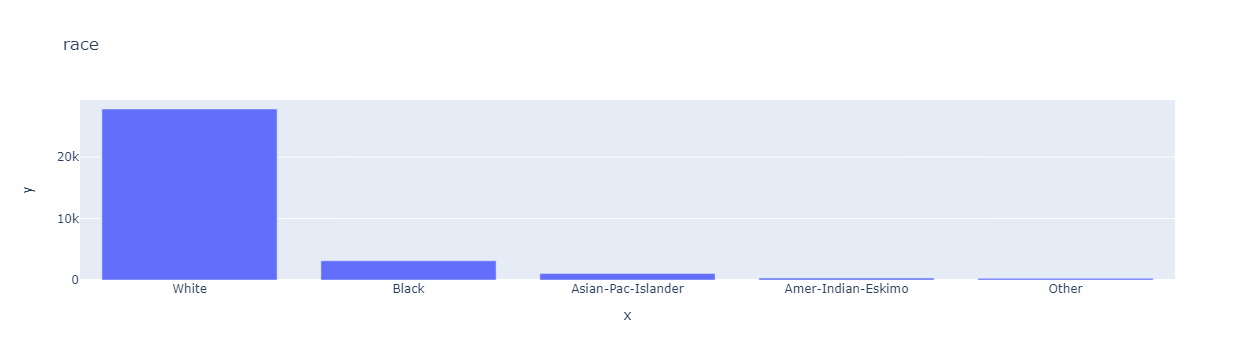

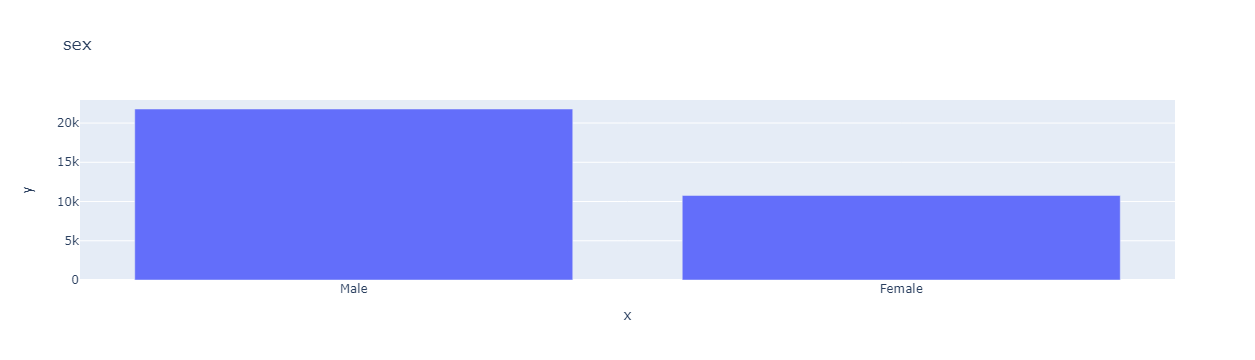

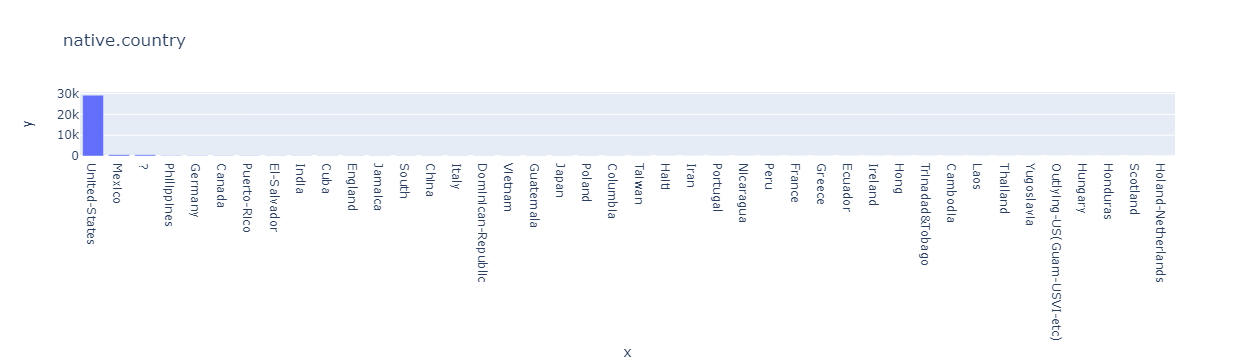

In [12]:
for i in dataSet.columns:
    mapData = dataSet[i].value_counts()
    if(len(mapData) > 50):
        continue
    fig = px.bar(x = mapData.index, y= mapData.values,
                title = i)
    fig.show()

In [13]:
for i in range(len(encodedData)):
    if(encodedData.iloc[i]['workclass'] == '?' or encodedData.iloc[i]['occupation'] == '?'):
        if(encodedData.iloc[i]['workclass'] != encodedData.iloc[i]['occupation']):
            print(encodedData.iloc[i]['workclass'])

Never-worked
Never-worked
Never-worked
Never-worked
Never-worked
Never-worked
Never-worked


In [14]:
dataSet.loc[dataSet['workclass'] == 'Never-worked', ['workclass']] = '?'

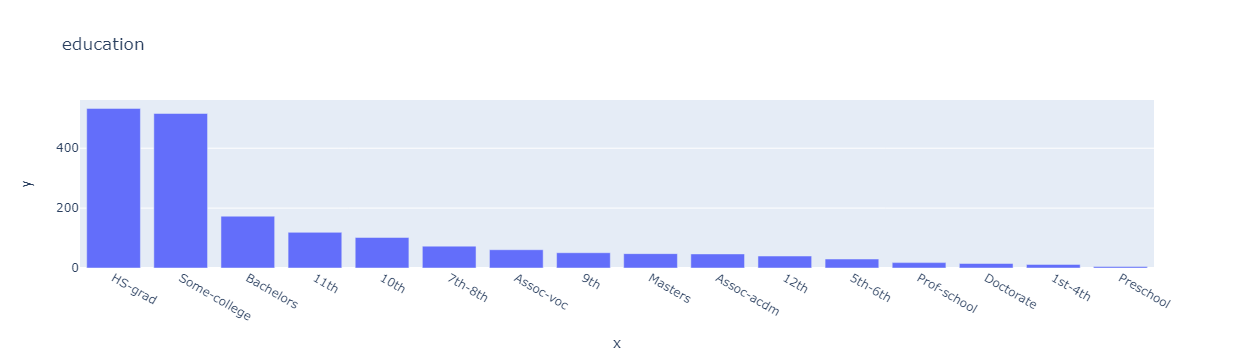

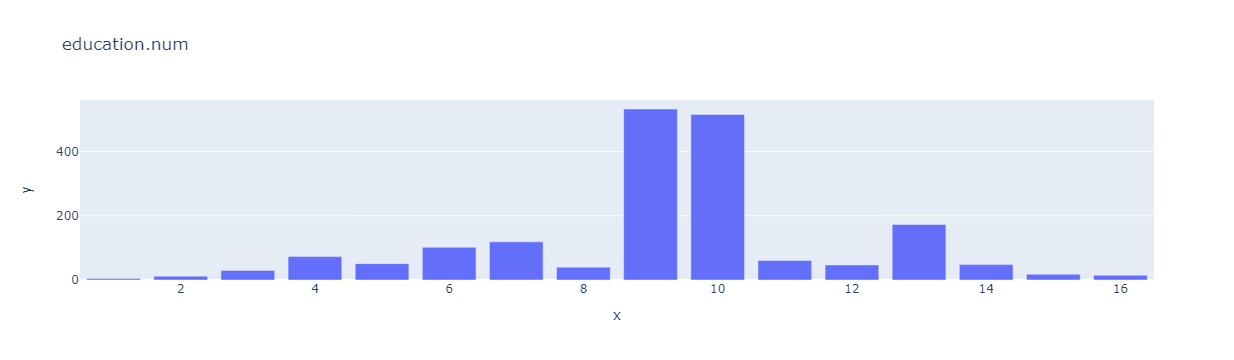

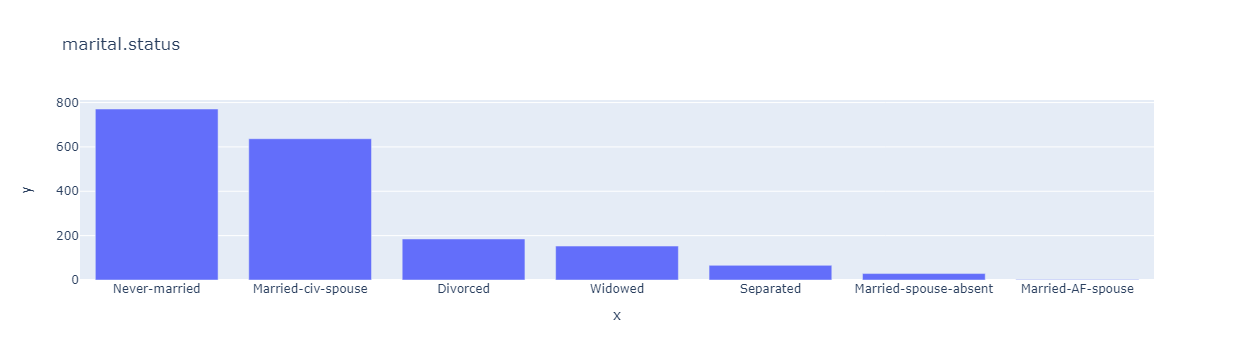

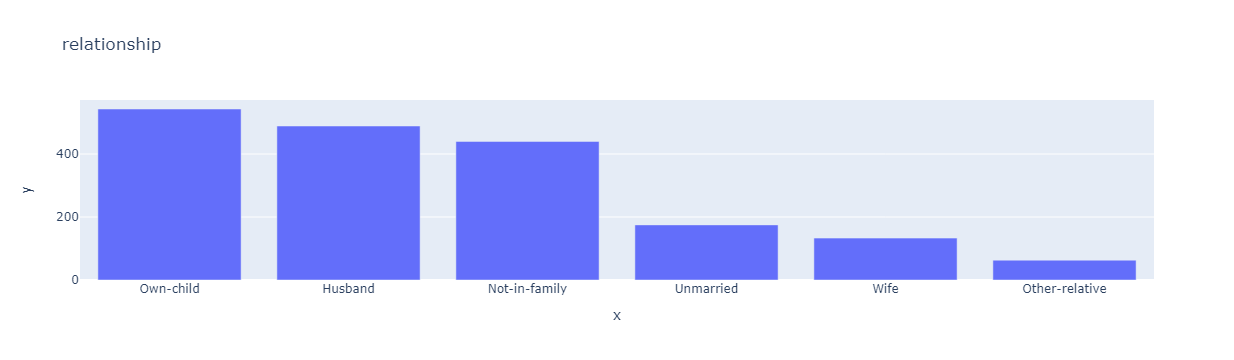

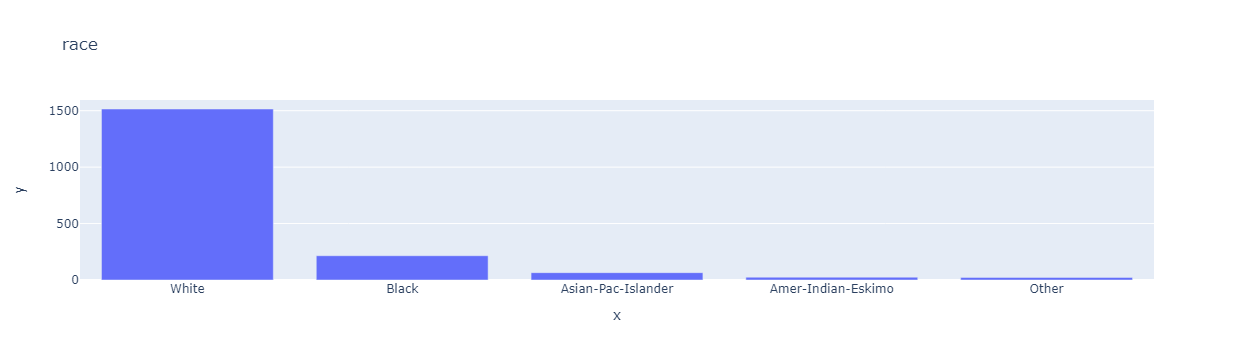

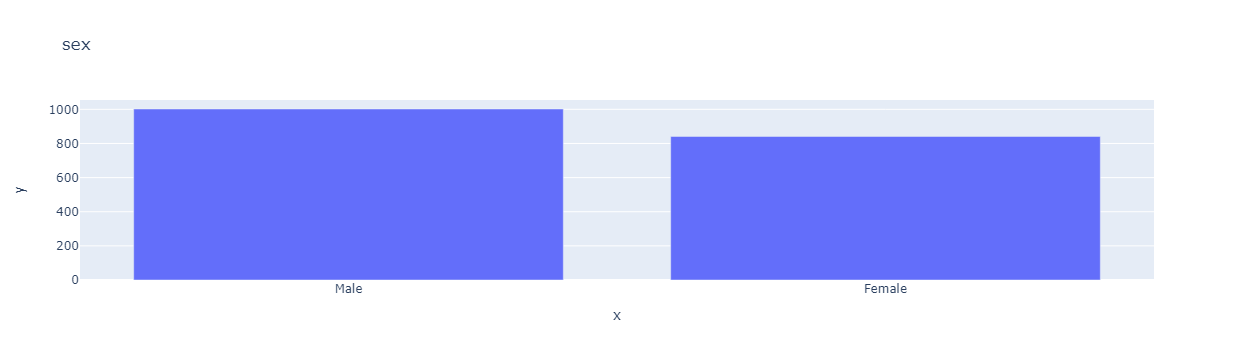

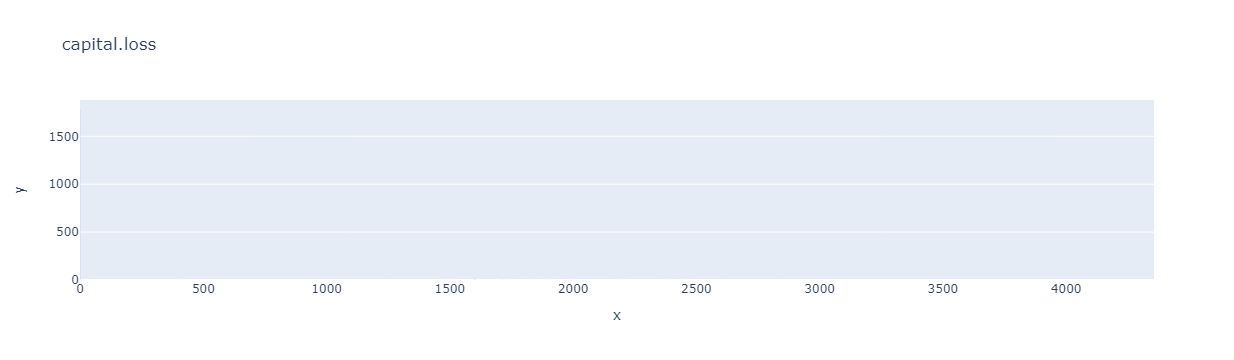

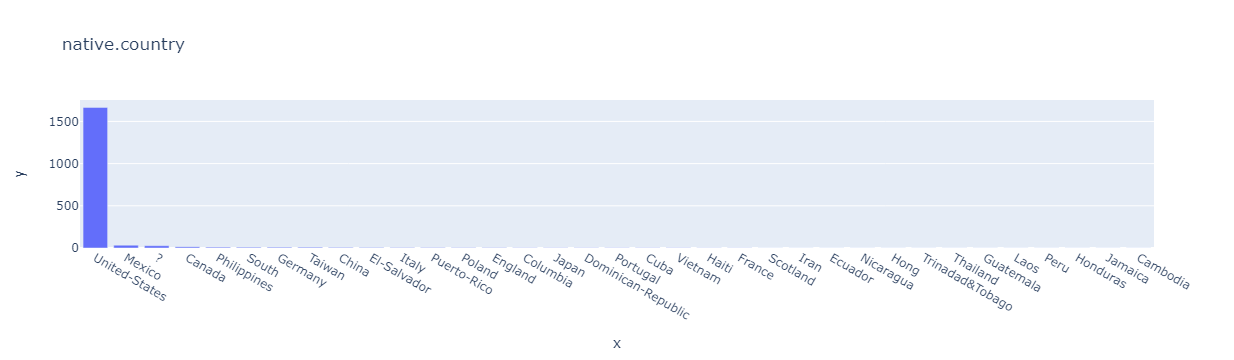

In [15]:
dataSetNull = dataSet[dataSet['occupation'] == '?']
for i in dataSetNull.columns:
    mapData = dataSetNull[i].value_counts()
    if(len(mapData) > 50 or len(mapData) == 1):
        continue
    fig = px.bar(x = mapData.index, y= mapData.values,
                title = i)
    fig.show()

In [16]:
data_master = encodedData.copy()
for i in empty_cols:
    data = data_master.copy()
    target = data.pop(i)
    cols = []
    for k in empty_cols:
        if(i != k):
            cols.append(k)
    print(i)
    data = data.drop(axis = 1, columns = cols)
    
    # splitting X and y into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=40)

    # training the model on training set
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # making predictions on the testing set
    y_pred = gnb.predict(X_test)

    # comparing actual response values (y_test) with predicted response values (y_pred)
    from sklearn import metrics
    print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

workclass
Gaussian Naive Bayes model accuracy(in %): 27.717502558853635
occupation
Gaussian Naive Bayes model accuracy(in %): 11.27942681678608
native.country
Gaussian Naive Bayes model accuracy(in %): 5.8751279426816785
